# Exercise 1

We want to show how the additive and multiplicative rotational increments are related

In [5]:
import numpy as np

# First we need to import the large rotation suite 
from meshpy import Rotation

We start of with a rotation $\psi_1 = [1,2,3]$, which is incremented by a second (additive) increment $\Delta \psi = [1,0,1]$

In [6]:
psi_1 = np.array([1,2,1])
triad_1 = Rotation.from_rotation_vector(psi_1)
delta_psi = 0.000001*np.array([1,0,1])
triad_2 = Rotation.from_rotation_vector(psi_1 + delta_psi)

Now we want to get the corresponding multiplicative increment (which is different from the additive increment!)

In [7]:
triad_21 = triad_2*triad_1.inv()
theta_21 = triad_21.get_rotation_vector()
print(theta_21)

[ 1.09698636e-06  4.92982354e-07 -8.29505744e-08]


We can relate them by the transformation matrix

In [8]:
np.dot(np.linalg.inv(triad_1.get_transformation_matrix_inv()), theta_21)

array([9.99999958e-07, 2.88761241e-13, 9.99999958e-07])

In [9]:
Rotation.from_rotation_vector([1,2,3]).get_transformation_matrix()

[-0.67925191 -1.35850382 -2.03775573]


array([[ 0.43648568, -0.93218335,  0.80929367],
       [ 1.10557237,  0.56652745, -0.07954242],
       [-0.54921014,  0.59970949,  0.78326372]])

/Users/ivosteinbrecher/miniforge3/envs/meshpy/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


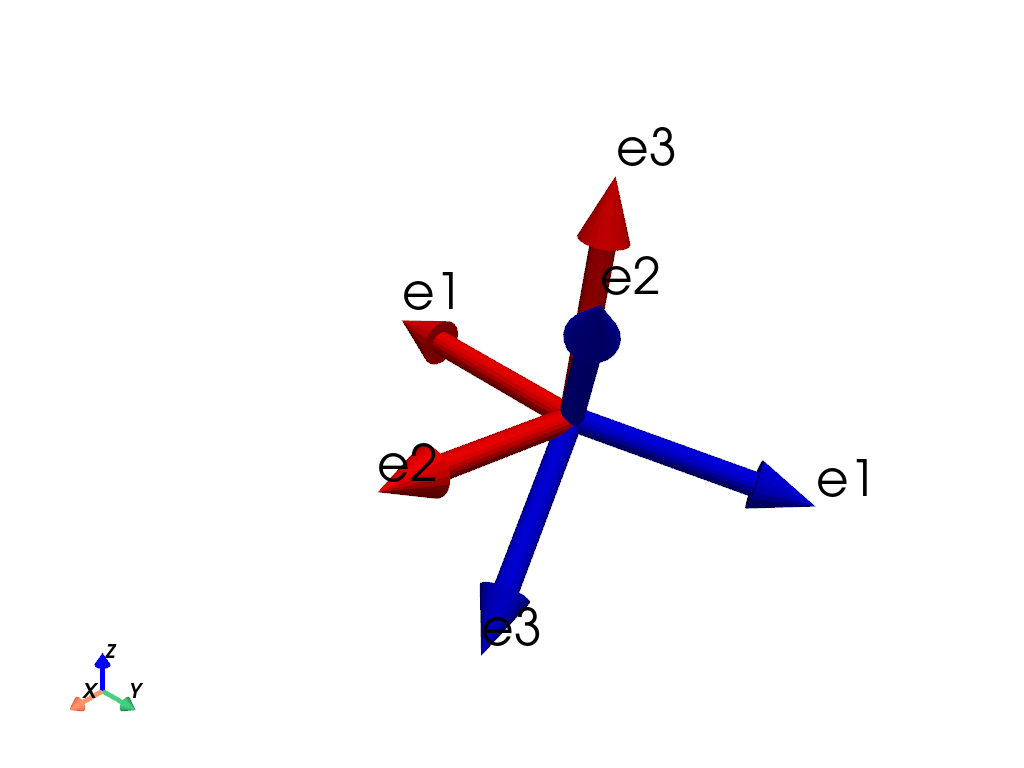

In [10]:
import pyvista as pv

pl = pv.Plotter()
# actor = pl.add_mesh(pv.Box(), show_edges=True)
_ = pl.add_axes(
    line_width=5,
    cone_radius=0.6,
    shaft_length=0.7,
    tip_length=0.3,
    ambient=0.5,
    label_size=(0.4, 0.16),
)


def plot_triad(rotation, *, color="blue", origin=np.array([0.0, 0.0, 0.0])):

    R = rotation.get_rotation_matrix()
    arrows = [
        pv.Arrow(start=origin, direction=R[:, i_dir], scale="auto")
        for i_dir in range(3)
    ]
    for arrow in arrows:
        pl.add_mesh(arrow, color=color)
    labels = [
        pv.Label(f"e{i_dir+1}", position=origin + R[:, i_dir]) for i_dir in range(3)
    ]
    for label in labels:
        pl.add_actor(label)
rotation = Rotation.from_rotation_vector(psi_1)

plot_triad(rotation)
plot_triad(Rotation([0, 0, 1], -0.5 * np.pi) * Rotation([1, 0, 0], 0.2), color="red")


pl.show()
